In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

# Load Reviews
In the previous stage, we filtered the user reviews we needed by some factors such as state, city, category in Business dataset. In this step we will build a text classifier using Python’s Pandas, NLTK and Scikit-learn libraries. We will explore Reviews dataset, look for correlations between the data, use natural language processing (NLP) to process the text, and build a sentiment analysis model that predicts whether a user liked a local restaurant or not, based on their review on Yelp.

In [33]:
file = "Reviews_r5000.csv"
df = pd.read_csv(file)
del df["Unnamed: 0"]
df['text length'] = df['text'].apply(len)
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text length
0,4fQPIhCh2bUJBZcxQlLGFQ,0,2014-08-11 11:11:00,0,Rr_613GjMqQKfh5NAWlyMQ,4.0,"Listen up, this is a good buffet - a buffet - ...",0,ba9Fz4_S5S1maikWswBEpQ,481
1,V9XlikTxq0My4gE8LULsjw,0,2016-09-06 02:45:41,0,a1VP27bgzixzrI6WOPP1jQ,5.0,Came in at 6:30 pm on Labor Day for dinner on ...,0,DhfFfbGGFv9yorH5KDEWYQ,868
2,DsKzHnkLKnxZTVsFpts4oA,0,2017-07-18 19:10:43,0,DGq-K-XhBq4ViKL-I0i6pw,4.0,"It's a nice two-leveled tavern, right across f...",0,Zt9dmWEJmX6oBNNDWS_whw,395
3,CA5BOxKRDPGJgdUQ8OUOpw,0,2013-10-04 01:27:26,0,fB_0ZiIHbr-Nmwd-SUdSqg,5.0,We went on a Sunday night and it was surprisin...,0,Vve73msJ9nzxzhehHvpACg,670
4,NV6zZPb5OGVpyX4JrSzUPg,2,2018-02-24 00:14:21,1,hzXVHZTl4bB6OL-CV-zGBQ,5.0,"FAN.TAS.TIC! This place is the real deal, folk...",3,970YlfubcATt-Bl8LGocFw,892


In [34]:
df.describe()

,cool,funny,stars,useful,text length
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,0.520800,0.328200,3.753200,1.240800,569.36240
std,2.441467,1.594175,1.467897,3.528074,526.15703
min,0.000000,0.000000,1.000000,0.000000,27.00000
25%,0.000000,0.000000,3.000000,0.000000,231.00000
50%,0.000000,0.000000,4.000000,0.000000,408.00000
75%,0.000000,0.000000,5.000000,1.000000,722.00000
max,127.000000,81.000000,5.000000,135.000000,4972.00000


## Search for collerations and relevant features
Seaborn's FacetGrid allows us to create a grid of bar charts placed side-by-side. We use FacetGrid to see if there is any relationship between the text length characteristics of user reviews and star ratings.

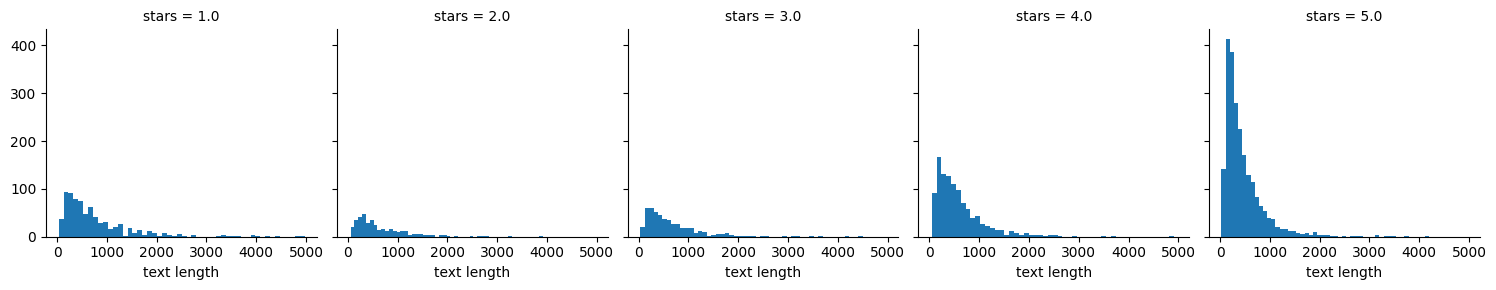

In [32]:
g = sns.FacetGrid(data=df, col='stars')
g.map(plt.hist, 'text length', bins=50)

从五张图的分布可以看出，大多数评论的文本长度都在0～1000左右，随着文本长度的增加，评论的数量越来越少。

In [16]:
stars = df.groupby('stars').mean()
stars.corr()

,cool,funny,useful,text length
cool,1.000000,-0.502337,-0.632625,-0.669432
funny,-0.502337,1.000000,0.685667,0.837723
useful,-0.632625,0.685667,1.000000,0.762144
text length,-0.669432,0.837723,0.762144,1.000000


<AxesSubplot: >

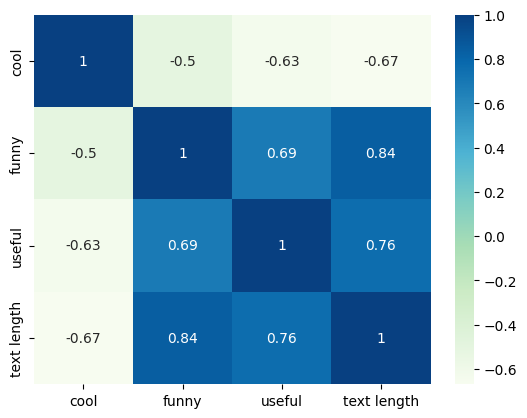

In [29]:
sns.heatmap(data=stars.corr(), annot=True, cmap="GnBu")